## Notebook following meeting on Fri 23rd Nov

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

### Check histograms for Radius, Mass, Temperature, and uncertainties between APOKASC and Yu+18 samples

In [2]:
yu = pd.read_csv(__datdir__+'rcxyu18.csv')
apo = pd.read_csv(__datdir__+'rcxyuxapokasc2.csv')

Temperature and fractional uncertainty on temperature

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/oliver/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


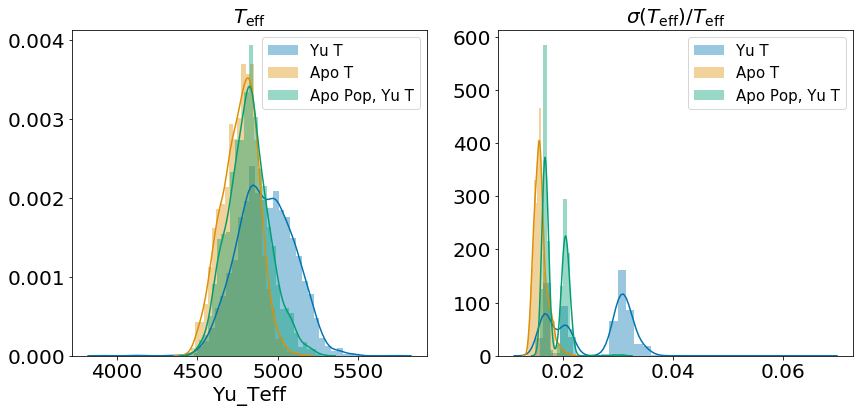

In [3]:
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.distplot(yu.Teff, label='Yu T', ax=ax[0])
sns.distplot(apo.Teff, label='Apo T', ax=ax[0])
sns.distplot(apo.Yu_Teff, label='Apo Pop, Yu T', ax=ax[0])
sns.distplot(yu.Teff_err/yu.Teff, label='Yu T', ax=ax[1])
sns.distplot(apo.Teff_err/apo.Teff, label='Apo T', ax=ax[1])
sns.distplot(apo.Yu_Teff_err/apo.Yu_Teff, label='Apo Pop, Yu T', ax=ax[1])
ax[0].set_title(r'$T_{\rm eff}$',fontsize=20)
ax[1].set_title(r'$\sigma(T_{\rm eff})/T_{\rm eff}$',fontsize=20)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
plt.show()

Mass, and uncertainty on mass (**using masses from Yu et al. 2018, with RC corrections to $\Delta\nu$**

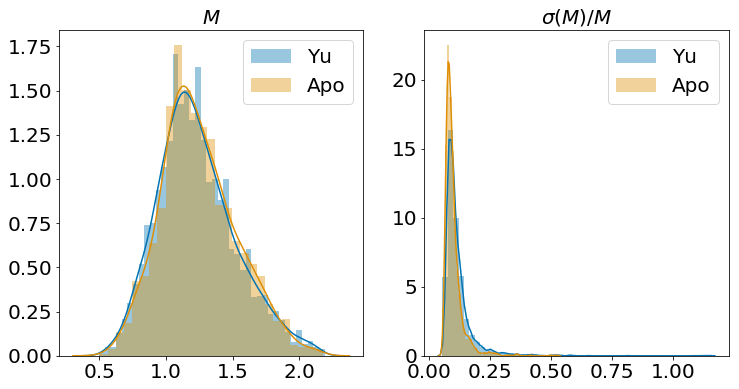

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(yu.M_Clump.values, label='Yu', ax=ax[0])
sns.distplot(apo.M_Clump.values, label='Apo', ax=ax[0])
sns.distplot(yu.M_Clump_err/yu.M_Clump, label='Yu', ax=ax[1])
sns.distplot(apo.M_Clump_err/apo.M_Clump, label='Apo', ax=ax[1])
ax[0].set_title(r'$M$',fontsize=20)
ax[1].set_title(r'$\sigma(M)/M$',fontsize=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
plt.show()

Radius and uncertainty on radius (**using radii from Yu et al. 2018, with RC corrections to $\Delta\nu$**)

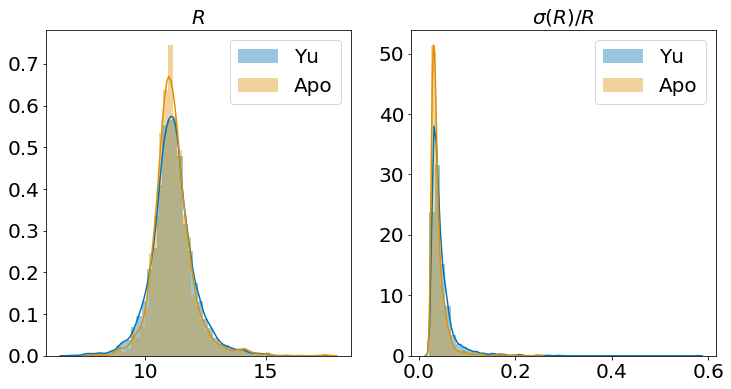

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(yu.R_Clump.values, label='Yu', ax=ax[0])
sns.distplot(apo.R_Clump.values, label='Apo', ax=ax[0])
sns.distplot(yu.R_Clump_err/yu.R_Clump, label='Yu', ax=ax[1])
sns.distplot(apo.R_Clump_err/apo.R_Clump, label='Apo', ax=ax[1])
ax[0].set_title(r'$R$',fontsize=20)
ax[1].set_title(r'$\sigma(R)/R$',fontsize=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
plt.show()

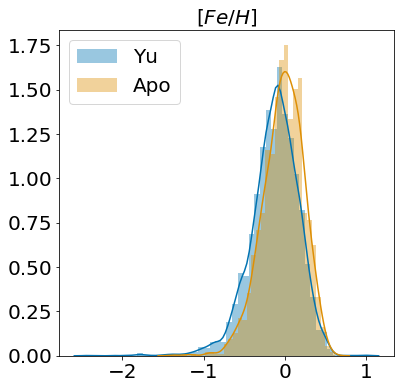

In [6]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.distplot(yu['[Fe/H]'].values, label='Yu', ax=ax)
sns.distplot(apo['[Fe/H]'].values, label='Apo', ax=ax)
ax.set_title(r'$[Fe/H]$',fontsize=20)
ax.legend(fontsize=20)
plt.show()

### Conclusion:
There is a very clear shift in temperature population, even within the Yu et. al 2018 temperatures!

Let have a look at how this impacts the inferred position of the Clump. We *know* that APOKASC temperatures place the clump at a fainter magnitude. But is this actually just a population effect? We can investigate by plotting both populations but using all Yu parameters.

In [7]:
bcs_yu = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/BCs/Logg_perturbed/casagrande_bcs_0.0.csv')
bcs_apo = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/BCs/APOKASC/casagrande_bcs_0.0.csv')
yu = pd.merge(yu, bcs_yu, how='left', on='KICID')
apotrue = pd.merge(apo, bcs_apo, how='left', on='KICID')
apo = pd.merge(apo, bcs_yu, how='left', on='KICID')

In [8]:
from omnitool.literature_values import Rsol, Msol, Lsol, Zsol
from omnitool import scalings

sc = scalings(apo.numax, apo.dnu, apo.Yu_Teff,\
                      _numax_err = apo.numax_err, _dnu_err = apo.dnu_err,\
                      _Teff_err = apo.Yu_Teff_err)
apo['Mbol'] = sc.get_bolmag()

sc = scalings(apo.numax, apo.dnu, apo.Teff,\
                      _numax_err = apo.numax_err, _dnu_err = apo.dnu_err,\
                      _Teff_err = apo.Teff_err)
apotrue['Mbol'] = sc.get_bolmag()

Calculating luminosity using basic asteroseismic radius
Calculating luminosity using basic asteroseismic radius


In [9]:
yu['Mk'] = yu.Mbol - yu['BC_K']
apo['Mk'] = apo.Mbol - apo['BC_K']
apotrue['Mk'] = apotrue.Mbol - apotrue['BC_K']
yu['Mg'] = yu.Mbol - yu['BC_GAIA']
apo['Mg'] = apo.Mbol - apo['BC_GAIA']
apotrue['Mg'] = apotrue.Mbol - apotrue['BC_GAIA']

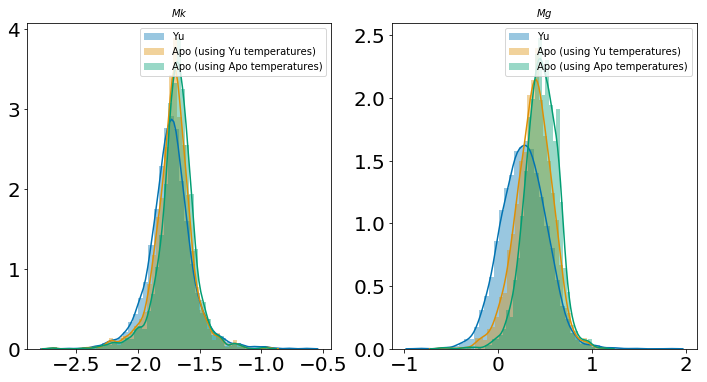

-1.7352148327537933
-1.7075901617169078
-1.6802163216866828
0.26893810257612816
0.3871743217453541
0.4572872650154847


In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(yu.Mk.values, label='Yu', ax=ax[0])
sns.distplot(apo.Mk.values, label='Apo (using Yu temperatures)', ax=ax[0])
sns.distplot(apotrue.Mk.values, label='Apo (using Apo temperatures)', ax=ax[0])
ax[0].set_title(r'$Mk$',fontsize=10)
ax[0].legend(fontsize=10)

sns.distplot(yu.Mg.values, label='Yu', ax=ax[1])
sns.distplot(apo.Mg.values, label='Apo (using Yu temperatures)', ax=ax[1])
sns.distplot(apotrue.Mg.values, label='Apo (using Apo temperatures)', ax=ax[1])
ax[1].set_title(r'$Mg$',fontsize=10)
ax[1].legend(fontsize=10)
plt.show()
print(np.median(yu.Mk))
print(np.median(apo.Mk))
print(np.median(apotrue.Mk))

print(np.median(yu.Mg))
print(np.median(apo.Mg))
print(np.median(apotrue.Mg))

# Lets have a look at our sample of 1000 shuffled stars compared to the full thing

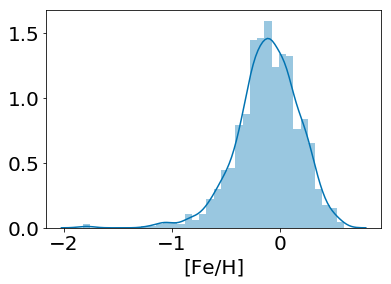

In [21]:
sns.distplot(df['[Fe/H]'])

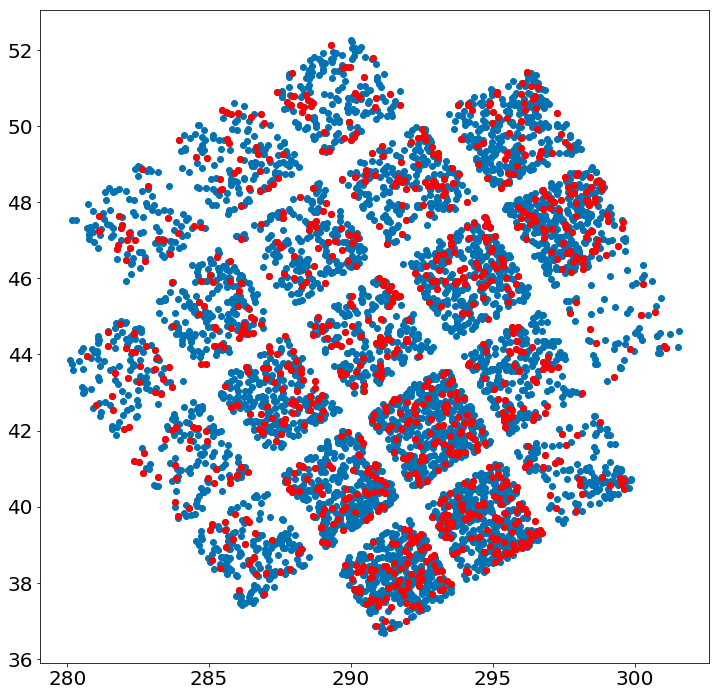

In [12]:
from sklearn.utils import shuffle
df = shuffle(yu, random_state=24601)[:1000].reset_index()

fig = plt.figure(figsize=(12,12))
plt.scatter(yu.ra, yu.dec)
plt.scatter(df.ra, df.dec, c='r')

Text(0.5,1,'Full: 0.233 | 1000: 0.233')

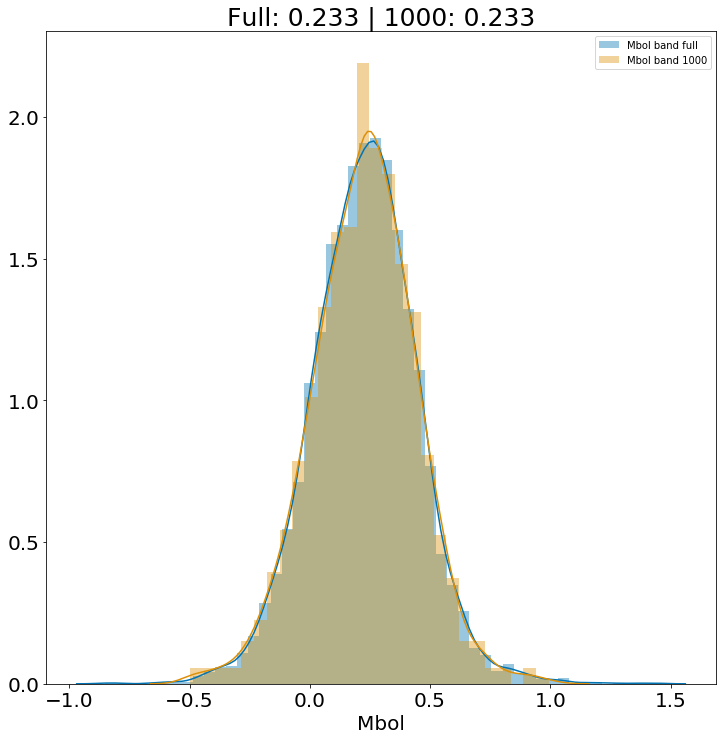

In [20]:
fig = plt.figure(figsize=(12,12))
sns.distplot(yu.Mbol, label='Mbol band full')
sns.distplot(df.Mbol, label='Mbol band 1000')
plt.legend()
plt.title('Full: {:.3f} | 1000: {:.3f}'.format(np.median(yu.Mbol), np.median(df.Mbol)),fontsize=25)

# Conclusion: this is not a population effect